The purpose of this notebook is to use find best estimator and use gridsearch to find best parameters.

In [1]:
# imports
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# import custom stop words
from customstopwords import custom_stop_words_all
# import sentiment analysis tool
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In last modeling attempt best model was the stemmed countvectorized logistic regression.
I will use that as a base to gridsearch best countvectorize parameters and determine best classifier.

In [2]:
# read in stemmed data
df = pd.read_csv('../CommentFiles/Comments_EDA_stem.csv')

In [3]:
# create classes for subreddit 
df['subreddit'] = df['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

In [4]:
# set X and y
X = df['body']
y = df['subreddit']

In [5]:
# TTS
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [6]:
# TF-IDF attempt
cvec = CountVectorizer(stop_words=custom_stop_words_all)

In [7]:
# fit and transform to tvec training data
X_train_cvec = cvec.fit_transform(X_train.astype(str))

In [8]:
# transform to tvec test data
X_test_cvec = cvec.transform(X_test.astype(str))

In [9]:
# Create function to create a dataframe of all accuracy scores for estimators
# instaniate all models in use
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
abc = AdaBoostClassifier()
bag = BaggingClassifier()

In [10]:
# create list of estimators
class_list = [logreg, knn, svc, forest, tree, abc, bag]

In [11]:
# define function to create dataframe
def modeling(X_train, X_test, y_train, y_test, class_list):
    # create lists for scores 
    train_score = []
    test_score = []
    acc_score = []
    # for each classifier fit and score
    for classifier in class_list:
        classifier.fit(X_train, y_train)
        train_score.append(classifier.score(X_train, y_train))
        test_score.append(classifier.score(X_test, y_test))
        acc_score.append(accuracy_score(y_test, classifier.predict(X_test)))
    # combine into dataframe
    return pd.DataFrame(data=[train_score, test_score, acc_score],
                 index=['train_score', 'test_score', 'acc_score'],
                 columns=[str(c) for c in class_list]).T

In [14]:
mod_df = modeling(X_train_cvec, X_test_cvec, y_train, y_test, class_list)

In [15]:
mod_df

,train_score,test_score,acc_score
LogisticRegression(),0.947066,0.827916,0.827916
KNeighborsClassifier(),0.785077,0.673040,0.673040
SVC(),0.894983,0.807521,0.807521
RandomForestClassifier(),0.981718,0.814532,0.814532
DecisionTreeClassifier(),0.981718,0.766093,0.766093
AdaBoostClassifier(),0.741709,0.725940,0.725940
BaggingClassifier(),0.966624,0.764818,0.764818


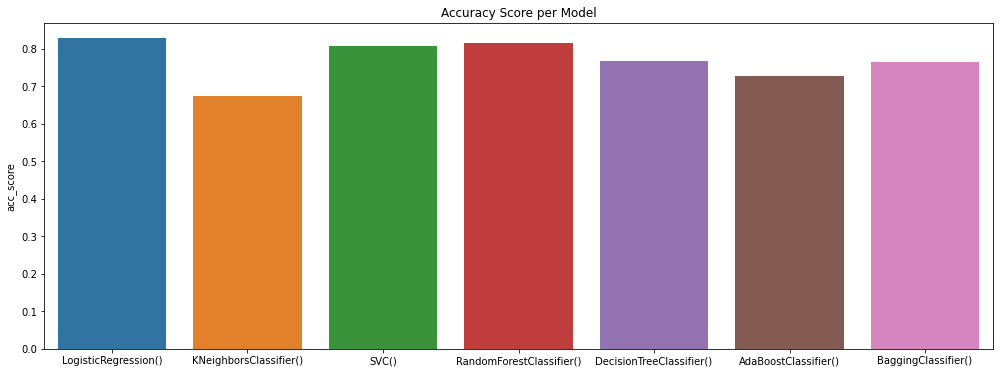

In [16]:
# plot this
plt.figure(figsize=(17,6))
sns.barplot(data=mod_df, x=mod_df.index, y='acc_score')
plt.title('Accuracy Score per Model');

## Annotation:
Graph shows deafult parameters for each classifier and their accuracy score with countvectorized stemmed data.  Logistic regression shown again as the highest accuracy score followed by SVC and random forest.


In [19]:
# frist gridsearch countvectorizer and logistic regression
# based on the previous models will use half the size of sparse matrix for max_feartures
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [48]:
# pipe params
pipe_params = {
    'cvec__stop_words'   : [None, custom_stop_words_all],
    'cvec__max_features' : [None, 3500],
    'cvec__ngram_range'  : [(1,1), (1,4)],
    'logreg__C'          : np.linspace(0.0001, 0.75, 5),
    'logreg__max_iter'   : [1000],
    'logreg__penalty'    : ['l1', 'l2'],
    'logreg__solver'     : ['liblinear']
}

In [49]:
gs1 = GridSearchCV(pipe, pipe_params, cv=5)

In [50]:
gs1.fit(X_train.astype(str), y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_features': [None, 3500],
                         'cvec__ngram_range': [(1, 1), (1, 4)],
                         'cvec__stop_words': [None,
                                              ['had', 'her', 'since', 'nobody',
                                               'rather', 'alone', 'thus',
                                               'cant', 'own', 'bill',
                                               'yourself', 'what', 'mine',
                                               'fifteen', 'a', 'moreover',
                                               'interest', 'three', 'to',
                                               'next', 'hereby', 'themselves',
                                               'six', 'our', 'hasnt', 'none',
                                               'well', '

In [51]:
gs1.best_params_

{'cvec__max_features': None,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': ['had',
  'her',
  'since',
  'nobody',
  'rather',
  'alone',
  'thus',
  'cant',
  'own',
  'bill',
  'yourself',
  'what',
  'mine',
  'fifteen',
  'a',
  'moreover',
  'interest',
  'three',
  'to',
  'next',
  'hereby',
  'themselves',
  'six',
  'our',
  'hasnt',
  'none',
  'well',
  'found',
  'together',
  'if',
  'go',
  'same',
  'us',
  'move',
  'as',
  'will',
  'at',
  'last',
  'latter',
  'also',
  'first',
  'ourselves',
  'ever',
  'thick',
  'am',
  'but',
  'find',
  'by',
  'de',
  'otherwise',
  'once',
  'during',
  'ours',
  'full',
  'almost',
  'whither',
  'he',
  'are',
  'along',
  'anywhere',
  'nothing',
  'seem',
  'which',
  'this',
  'already',
  'throughout',
  'whoever',
  'yourselves',
  'she',
  'something',
  'sincere',
  'them',
  'could',
  'ie',
  'on',
  'yours',
  'least',
  'always',
  'that',
  'besides',
  'do',
  'has',
  'my',
  'every',
  'whenever',
  'lat

In [52]:
gs1.best_score_

0.8199394035317793

In [53]:
gs1.score(X_train.astype(str), y_train)

0.9409013605442177

In [54]:
gs1.score(X_test.astype(str), y_test)

0.8272785213511791

In [55]:
coef_df = pd.DataFrame(index=cvec.get_feature_names(), data=logreg.coef_[0], columns=['Coefficient Value'])

In [56]:
coef_df.sort_values(by='Coefficient Value', inplace=True)

In [57]:
coef_df.head(10)

,Coefficient Value
lineup,-2.967147
dfs,-2.602237
center,-2.526715
guard,-2.485724
tax,-2.049531
forward,-1.857140
entry,-1.810254
groupchat,-1.597185
contest,-1.581090
projection,-1.560179


In [58]:
coef_df.tail(10)

,Coefficient Value
michigan,1.616395
francis,1.618247
tailing,1.661246
houston,1.727950
ml,1.790283
gonzaga,1.816553
cuse,1.928455
stipe,2.064305
ngannou,2.085537
creighton,2.291127


## Annotation:
Negative coefficients have strongest correlation to dfsports and positive coeficients have strongest correlation to sportsbook.  The final model provided from the pipeline gave us an accuracy score of .82, which is better than the baseline of .50.  This is not the best model but by reducing the C value and adding a penalty we were able to combat the over fitness of the base model.  As a recommendation, to help our model in both accuracy and over fitness more cleaning would need to be performed.  There are words that are bogging down the model, so another run at taking out unnecessary words and adding more stop words would be a solution to this problem.  Another solution could be adding more data, using more comments from another point in time. Figure 3 shows the scores of the models performance, below.

In [100]:
# next classifier is support vector machines where we will use C, gamma, kernel has parameters
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('svc', SVC())
])

In [110]:
# pipe params
pipe_params2 = {
    'cvec__max_features' : [500, 1000, 1500],
    'cvec__ngram_range'  : [(1,1), (1,3), (1,4)],
    'svc__C'             : np.linspace(0.0001, .75, 5),
    'svc__gamma'         : ['scale', 'auto'],
    'svc__kernel'        : ['linear', 'rbf']
}

In [111]:
gs2 = GridSearchCV(pipe2, pipe_params2, cv=5)

In [112]:
gs2.fit(X_train.astype(str), y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'cvec__max_features': [500, 1000, 1500],
                         'cvec__ngram_range': [(1, 1), (1, 3), (1, 4)],
                         'svc__C': array([1.00000e-04, 1.87575e-01, 3.75050e-01, 5.62525e-01, 7.50000e-01]),
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf']})

In [113]:
gs2.best_score_

0.7891147941302824

In [114]:
gs2.score(X_train.astype(str), y_train)

0.877125850340136

In [115]:
gs2.score(X_test.astype(str), y_test)

0.815806246016571

In [116]:
gs2.best_params_

{'cvec__max_features': 1500,
 'cvec__ngram_range': (1, 3),
 'svc__C': 0.187575,
 'svc__gamma': 'scale',
 'svc__kernel': 'linear'}

## Annotation:
Starting to see a ceiling for testing score, around .80-.82 between classifiers.  SVC has a accuracy score less than the logistic regression and shows same over fitness between training and testing scores.

In [72]:
ranforest = RandomForestClassifier()

In [75]:
ranforest.fit(X_train_cvec, y_train)

RandomForestClassifier()

In [82]:
# check random forest, stats
ranforest.score(X_train_cvec, y_train)

0.98171768707483

In [85]:
# test score
ranforest.score(X_test_cvec, y_test)

0.8138942001274697

In [86]:
accuracy_score(y_test, ranforest.predict(X_test_cvec))

0.8138942001274697

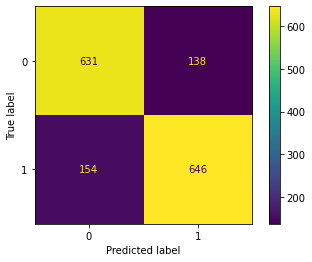

In [88]:
cm = confusion_matrix(y_test, ranforest.predict(X_test_cvec))
ConfusionMatrixDisplay(cm).plot();

## Annotation:
Again testing score capping out at similar range mentioned above.  Very strong training score parameters need to combat that.  